# ***Sugercane data Analysis***

In [9]:
import pandas as pd
import numpy as np 

In [10]:
#dropping the index column and taking sample from the dataset

df=pd.read_csv("./Dataset/Sugarcane_production.csv")
df=df.drop("Unnamed: 0",axis=1)
df.sample(5)

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
101,Samoa,Oceania,12,6,1,"11.949,8"
43,Guyana,South America,2.394.553,"3.061,207",44.311,"54.039,7"
94,Dominica,North America,4.855,68099,244,"19.914,4"
36,Zimbabwe,Africa,3.483.000,234563,43.5,80.069
91,Malaysia,Asia,5.714,175,88,"65.223,8"


In [11]:
print(f"The shape of the dataset= {df.shape}")

The shape of the dataset= (103, 6)


## **Data cleaning**

In [12]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [13]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [14]:
df.isna().sum()

Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [15]:
df=df.dropna().reset_index()

In [18]:
df.isna().sum()

index                         0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             0
Yield (Kg / Hectare)          0
dtype: int64

In [19]:
df.head()

,index,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [21]:
df.drop("index",axis=1,inplace=True)

In [22]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [ ]:
df.dtypes

Country                       object
Continent                     object
Production (Tons)             object
Production per Person (Kg)    object
Acreage (Hectare)             object
Yield (Kg / Hectare)          object
dtype: object

In [26]:
df["Production (Tons)"]=df["Production (Tons)"].astype("float")
df["Production per Person (Kg)"]=df["Production per Person (Kg)"].astype("float")
df["Acreage (Hectare)"]=df["Acreage (Hectare)"].astype("float")
df["Yield (Kg / Hectare)"]=df["Yield (Kg / Hectare)"].astype("float")

In [27]:
df.dtypes

Country                        object
Continent                      object
Production (Tons)             float64
Production per Person (Kg)    float64
Acreage (Hectare)             float64
Yield (Kg / Hectare)          float64
dtype: object

In [29]:
df.nunique()

Country                       102
Continent                       6
Production (Tons)             102
Production per Person (Kg)    101
Acreage (Hectare)             101
Yield (Kg / Hectare)          102
dtype: int64

How many countries grow sugercane from each continent

In [30]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

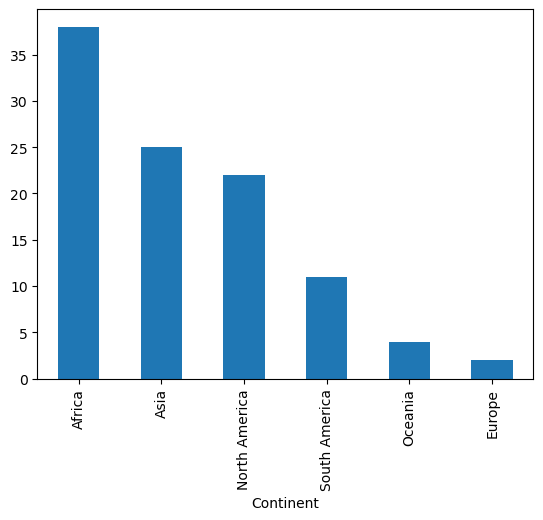

In [31]:
df["Continent"].value_counts().plot(kind="bar")

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

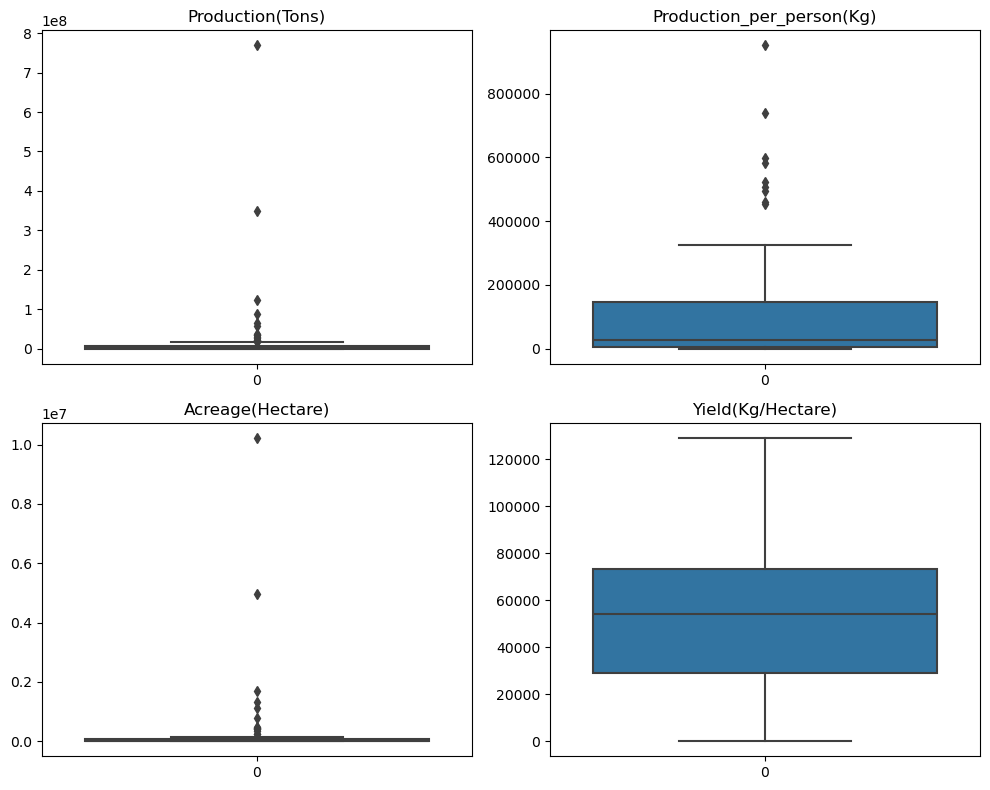

In [38]:
plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
sns.boxplot(df["Production (Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.boxplot(df["Production per Person (Kg)"])
plt.title("Production_per_person(Kg)")
plt.subplot(2,2,3)
sns.boxplot(df["Acreage (Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.boxplot(df["Yield (Kg / Hectare)"])
plt.title("Yield(Kg/Hectare)")
plt.tight_layout()
plt.show()

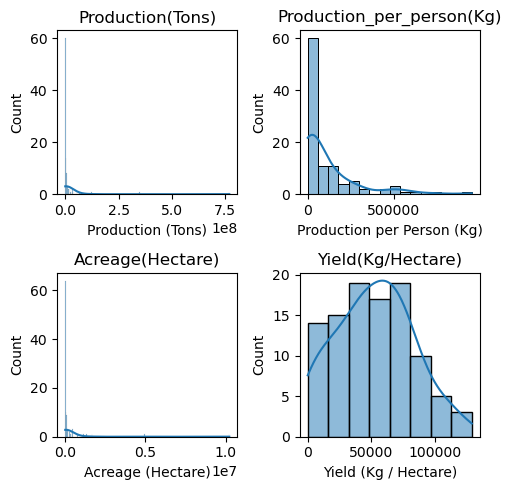

In [45]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize = (5,5))
plt.subplot(2,2,1)
sns.histplot(df["Production (Tons)"], kde=True)
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.histplot(df["Production per Person (Kg)"], kde=True)
plt.title("Production_per_person(Kg)")
plt.subplot(2,2,3)
sns.histplot(df["Acreage (Hectare)"], kde=True)
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.histplot(df["Yield (Kg / Hectare)"], kde=True)
plt.title("Yield(Kg/Hectare)")
plt.tight_layout()
plt.show()